# Практическая работа №2: Обработка выборочных данных. Нахождение точечных оценок параметров распределения

Выполнили студенты гр. 0382 Корсунов Антон и Здобнова Ксения. Вариант №11

## Цель работы

Получение практических навыков нахождения точечных статистических оценок параметров распределения.

## Основные теоретические положения


**Математическим ожиданием** дискретной случайной величины называется сумма произведений ее возможных значений на соответствующие им вероятности:

$M(X) = \frac {1} {N} \sum_{i=1}^n x_in_i$

**Дисперсией** случайной величины называется математическое ожидание квадрата ее отклонения от ее математического ожидания:

$D(X) = M(X-M(X))^2$

**Среднеквадратическим отклонением** случайной величины Х называется квадратный корень из ее дисперсии:

$σ = \sqrt{D(X)} $

**Выборочная дисперсия** определяется по формуле:

$D_B = \frac {1} {N} \sum_{i=1}^k (x_i - x)^2 $


**Исправленная выборочная дисперсия**:

$s^2 = \frac {N} {N - 1} D_B$


**Центральным моментом порядка k случайной величины X** называется математическое ожидание величины:

$M(X-M(X))^k = m_k$

**Асимметрией** называется числовая характеристика, определяемая выражением:

$A_s =  \frac {m_3} {s^3}$

где $m_3$ – центральный эмпирический момент третьего порядка, $s$ – исправленная выборочная дисперсия.

**Эксцессом**, или коэффициентом эксцесса, называется численная характе-ристика случайной величины, которая определяется выражением:

$E = \frac {m_4} {s^4} - 3$

**Мода** дискретной случайной величины – это наиболее вероятное значение этой случайной величины.

$M_o = x_o + \frac {m_2 - m_1} {(m_2-m_1) + (m_2-m_3)} h$


**Медиана** случайной величины $X$ – это такое ее значение $M_e$, для которого выполнено равенство

$M_e = x_o + \frac {0.5n - n^n_{m-1}} {n_o} h $


## Постановка задачи

Для заданных выборочных данных вычислить с использованием метода моментов и условных вариант точечные статистические оценки математического ожидания, дисперсии, среднеквадратичного отклонения, асимметрии, эксцесса, моды, медианы и коэффициента вариации исследуемой случайной величины. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы


Были импортированы библиотеки для работы с данными:

In [94]:
import pandas as pd
import io
import math
from prettytable import PrettyTable
from google.colab import files
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt
import numpy as np

Была загружена двумерная генеральная совокупность:

In [4]:
uploaded = files.upload() # загрузка файла формата "csv",
#содержащего генеральную совокупность
filename = next(iter(uploaded))
data = pd.read_csv(io.StringIO(uploaded[filename].decode('utf-8')))

Saving games.csv to games (1).csv


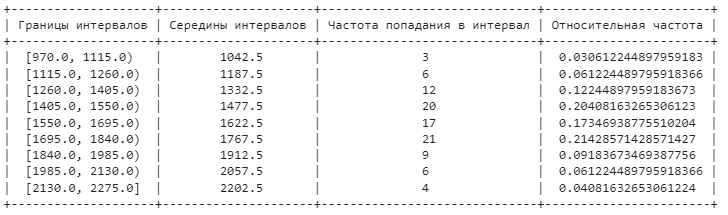

**Пункт 1**

Для середин интервального ряда, полученного в практической работе №1, были вычислены условные варианты. Был проведен контроль вычислений.


Для первой таблицы:

In [78]:
int_row = pd.read_csv('int_row.csv')

usl_table = int_row.copy()
usl_table = usl_table.iloc[:, [1,3]]
usl_table['u'] = np.arange(-4,5,1)
usl_table['nu'] = usl_table['rf']*usl_table['u']
usl_table['nu2'] = usl_table['rf']*pow(usl_table['u'], 2)
usl_table['nu3'] = usl_table['rf']*pow(usl_table['u'], 3)
usl_table['nu4'] = usl_table['rf']*pow(usl_table['u'], 4)
usl_table['nu4+'] = usl_table['rf']*pow(usl_table['u']+1, 4)
usl_table_f = usl_table.append(usl_table.sum(), ignore_index=True)
usl_table_f

<ipython-input-78-085095feb3ee>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  usl_table_f = usl_table.append(usl_table.sum(), ignore_index=True)


,avg_inter,rf,u,nu,nu2,nu3,nu4,nu4+
0,1178.722222,0.08,-4.0,-0.32,1.28,-5.12,20.48,6.48
1,1300.166667,0.09,-3.0,-0.27,0.81,-2.43,7.29,1.44
2,1421.611111,0.19,-2.0,-0.38,0.76,-1.52,3.04,0.19
3,1543.055556,0.16,-1.0,-0.16,0.16,-0.16,0.16,0.00
4,1664.500000,0.14,0.0,0.00,0.00,0.00,0.00,0.14
5,1785.944444,0.12,1.0,0.12,0.12,0.12,0.12,1.92
6,1907.388889,0.12,2.0,0.24,0.48,0.96,1.92,9.72
7,2028.833333,0.08,3.0,0.24,0.72,2.16,6.48,20.48
8,2150.277778,0.02,4.0,0.08,0.32,1.28,5.12,12.50
9,14980.500000,1.00,0.0,-0.45,4.65,-4.71,44.61,52.87


Контроль проерки частот:
$\sum n_j u^4_j + 4 \sum n_j u^3_j + 6 \sum n_j u^2_j + 4 \sum n_j u_j + 1 = 44.61 +  4 * -4.71 + 6 * 4.65 + 4 * -0.45 + 1 = 52.87 $


In [57]:
sums = usl_table_f.iloc[9, [3,4,5,6]]
sums[3] + 4*sums[2] + 6*sums[1] + 4*sums[0] + 1

52.87

**Пункт 2**

Были вычислены условные эмпирические моменты через условные варианты. С помощью условных эмпирических моментов были вычислены центральные эмпирические моменты.

In [79]:
h = 121

x = sums[0]*h+120.85
m2 = (sums[1] - pow(sums[0],2))*pow(h,2)
m3 = (sums[2] - 3*sums[1]*sums[0] + 2*pow(sums[0],3))*pow(h,3)
m4 = (sums[3] - 4*sums[2]*sums[0] + 6*sums[1]*pow(sums[0],2) - 3*pow(sums[0],4))*pow(h,4)

print(sums[0], x)
print(sums[1], m2)
print(sums[2], m3)
print(sums[3], m4)

-0.4500000000000001 66.39999999999998
4.65 65115.84750000001
-4.71 2454054.875250004
44.60999999999999 8929919014.62973


**Пункт 3**

Были вычислить выборочные среднее и дисперсия с помощью стандартной формулы и с помощью условных вариант.

In [80]:
n = 108
h = 121
int_mean = (int_row['avg_inter']*int_row['af']).sum()/n
int_var = (((int_row['avg_inter']-int_mean)**2)*int_row['af']).sum()/n
print(int_mean)
print(int_var)

1490.601851851852
73902.96313760603


In [92]:
first1 = pd.read_csv('first.csv')
first = first1.copy()

print(np.mean(first))
print(np.var(first))

1497.666667
73911.962963


Статистические оценки математического ожидания и дисперсии, вычисленные по стандартным формулам и с помощью условных вариант совпадают с небольшой погрешностью.

**Пункт 4**

Была вычислена исправленная выборочная дисперсия и исправленное СКО. Данные оценки были сравнены с смещёнными оценками дисперсии. Сделаны выводы.

In [81]:
s = int_var*(n/(n-1))
std_s = np.sqrt(s)
std_var = np.sqrt(int_var)
print(s)
print(std_s)
print(std_var)

74593.64503608832
273.1183718391868
271.8509943656746


Смещённая оценка дисперсиичто может привести к заниженным оценкам дисперсии, так как она меньше исправленной выборочной дисперсии.

**Пункт 5**

Была найдена статистическая оценка коэффициентов асимметрии и эксцесса. Сделаны выводы.

In [82]:
As = m3/(pow(s, 3))
Ex = (m4/(pow(s, 4))) - 3
As, Ex

(5.91260383946306e-09, -2.9999999997115703)

Коэффициент асимметрии положителен, следовательно, в данном случае это правосторонняя асимметрия, которая характеризуется удлиненным правым хвостом.

Коэффициент эксцесса отрицателен, следовательно, эмпирическое распределение является более низким и пологим относительно нормального распределения.


**Пункт 6**

Для интервального ряда былы вычислены мода, медиана и коэффициент вариации заданного распределения. Сделаны выводы.

In [87]:
raw_mode = 1603.77 + h*(2/3)
raw_median = 1603.77 + (((0.5*n)-36)/25)*h
v = std_s / x * 100
print("Мода:", raw_mode)
print("Медиана:", raw_median)
print("Коэффициент вариации:", v)


Мода: 1684.4366666666667
Медиана: 1690.8899999999999
Коэффициент вариации: 411.3228491554019


Мода смещена относительно центра модального интервала в сторону правого интервала с большей частотой. Медиана также смещена правее, так как по правую сторону находится большее количество вариант.

## Выводы

В ходе выполнения данной лабораторной работы были получены практические навыки нахождения точечных статистических оценок параметров распределения.

Для интервального ряда из лабораторной работы №1 были найдены середины интервалов и накопленные частоты, далее для полученных вариант были вычислены условные варианты. Были вычислены условные эмпирические моменты через условные варианты, и с их помощью вычислены начальные и центральные эмпирические моменты. Корректность вычислений была проверена контрольной суммой, которая дала понять, что вычисления были верны.

Были посчитаны выборочное среднее и дисперсия с помощью стандартных формул и с помощью условных вариант. Статистические оценки, вычисленные по стандартным формулам и с помощью условных вариант совпали.

Была найдена статистическая оценка коэффициентов асимметрии и эксцесса. Имеется правосторонняя асимметрия, которая характеризуется удлиненным правым хвостом.
Эмпирическое распределение является более низким и пологим относительно нормального распределения.
Для интервального ряда была вычислена мода и медиана. Мода оказалась смещена относительно центра модального интервала в сторону правого интервала с большей частотой. Медиана также смещена правее, так как по правую сторону находится большее количество вариант.
